In [23]:
import csv
from functools import cmp_to_key
import json
import os

import matplotlib.pyplot as plt
import numpy as np

In [63]:
# hyperparameter tuning
experiments = []

hp_path = "/home/neleac/Downloads/_objective_2023-03-06_13-31-05"
for item in os.listdir(hp_path):
    exp_path = os.path.join(hp_path, item)
    if os.path.isdir(exp_path):
        with open(os.path.join(exp_path, "params.json")) as file:
            params = json.load(file)
        
        losses = []
        with open(os.path.join(exp_path, "progress.csv")) as file:
            data = csv.reader(file)            
            for i, row in enumerate(data):
                if i == 0:
                    continue
                losses.append(row[0])
            
        experiments.append((params, losses))

experiments

[({'learning_rate': 1.1908792847137804e-06,
   'lr_scheduler_type': 'cosine',
   'warmup_ratio': 0.10133282058069125,
   'weight_decay': 0.00012544999625238273},
  ['0.09045056998729706']),
 ({'learning_rate': 2.4555217959666895e-06,
   'lr_scheduler_type': 'cosine',
   'warmup_ratio': 0.16215650888260089,
   'weight_decay': 2.5947102035921654e-05},
  ['0.08478132635354996']),
 ({'learning_rate': 0.0007543587522568155,
   'lr_scheduler_type': 'cosine',
   'warmup_ratio': 0.1556278006264735,
   'weight_decay': 0.0002822967367028475},
  ['0.08585448563098907']),
 ({'learning_rate': 4.2762062880710175e-05,
   'lr_scheduler_type': 'linear',
   'warmup_ratio': 0.19729744888051282,
   'weight_decay': 0.0005394456143153435},
  ['0.07532892376184464']),
 ({'learning_rate': 3.9214953839310095e-05,
   'lr_scheduler_type': 'linear',
   'warmup_ratio': 0.0735292504711689,
   'weight_decay': 0.00018251934303093457},
  ['0.07449596375226974',
   '0.07356826961040497',
   '0.0736757144331932',
   '0.

In [61]:
# sort by eval_loss
def compare_loss(exp1, exp2):
    min1, min2 = min(exp1[1]), min(exp2[1])
    return float(min1) - float(min2)

epochs, losses, lr_rates, lr_schedulers, warmup_rations, weight_decays = [], [], [], [], [], []
for params, eval_loss in sorted(experiments, key=cmp_to_key(compare_loss))[:int(0.2 * len(experiments))]:
    min_loss, epoch = np.inf, 0
    for i, loss in enumerate(eval_loss):
        loss = float(loss)
        if loss < min_loss:
            min_loss = loss
            epoch = i + 1
    
    epochs.append(epoch)
    losses.append(min_loss)
    lr_rates.append(params["learning_rate"])
    lr_schedulers.append(params["lr_scheduler_type"])
    warmup_rations.append(params["warmup_ratio"])
    weight_decays.append(params["weight_decay"])

print("Best Epoch")
print(sorted(epochs))
print("Loss")
print(sorted(losses))
print("Learning Rate")
print(sorted(lr_rates))
print("LR Schedule")
print(sorted(lr_schedulers))
print("Warmup Ratio")
print(sorted(warmup_rations))
print("Weight Decay")
print(sorted(weight_decays))

Best Epoch
[2, 2, 2, 2, 3]
Loss
[0.07307732105255127, 0.07356826961040497, 0.07365747541189194, 0.07374133169651031, 0.07377222925424576]
Learning Rate
[2.4641228331030275e-05, 2.9401880334826167e-05, 3.9214953839310095e-05, 6.821721398124398e-05, 0.00011032556205764249]
LR Schedule
['cosine', 'cosine', 'linear', 'linear', 'linear']
Warmup Ratio
[0.0013957948375769719, 0.022948478586945067, 0.02741925581572764, 0.0735292504711689, 0.07584833483532072]
Weight Decay
[0.00013290983800819223, 0.00018251934303093457, 0.00018473132651481358, 0.0002015080406337604, 0.00029059234348108266]


In [62]:
# eval_loss continued decreasing for 3 epochs
exps = []
for experiment in experiments:
    _, losses = experiment
    if len(losses) > 2 and losses[2] < losses[1]:
        exps.append(experiment)
        
exps

[({'learning_rate': 2.1686368937322704e-05,
   'lr_scheduler_type': 'linear',
   'warmup_ratio': 0.12144498596232355,
   'weight_decay': 0.00014156284033653655},
  ['0.07536936551332474',
   '0.07415234297513962',
   '0.07397258281707764',
   '0.07427273690700531',
   '0.07455293834209442']),
 ({'learning_rate': 2.4641228331030275e-05,
   'lr_scheduler_type': 'linear',
   'warmup_ratio': 0.07584833483532072,
   'weight_decay': 0.0002015080406337604},
  ['0.07501119375228882',
   '0.07393109798431396',
   '0.07374133169651031',
   '0.07414451241493225',
   '0.07456628233194351'])]

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Score')]

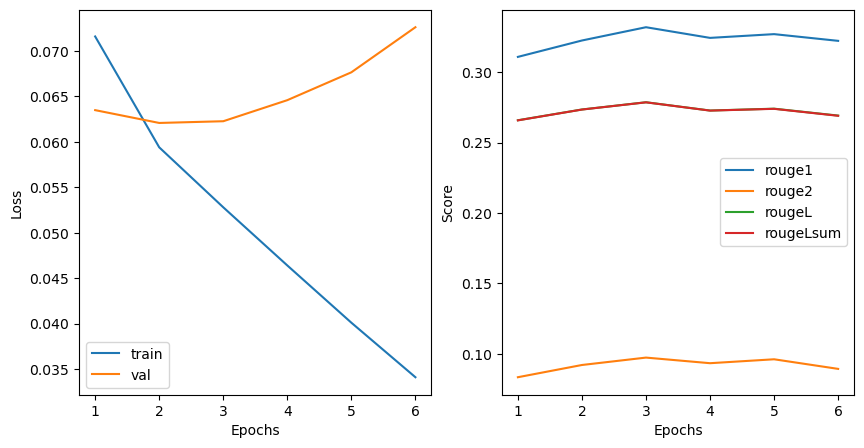

In [2]:
train_loss = [0.0716, 0.0594, 0.0528, 0.0464, 0.0401, 0.0341]
val_loss = [0.06349249929189682, 0.062082067131996155, 0.06227167323231697, 0.06459050625562668, 0.06765604764223099, 0.07261750847101212]
rouge1 = [0.3109468967982723, 0.32258973378382594, 0.33202012162684336, 0.3244469201792264, 0.32710731989420105, 0.3223431535028125]
rouge2 = [0.08342691854892492, 0.09211363608176015, 0.09736796401363476, 0.09338611689306828, 0.09616932166092645, 0.08935076109252794]
rougeL = [0.2659340210033512, 0.27358987729133005, 0.2787307152094547, 0.27283733636171736, 0.27416450929186664, 0.2692633279150254]
rougeLsum = [0.2658642126946146, 0.2735378645107157, 0.2786699284416258, 0.27280123447152205, 0.274059189980988, 0.26912015075381635]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
x_axis = np.arange(len(train_loss)) + 1

ax1.plot(x_axis, train_loss, label="train")
ax1.plot(x_axis, val_loss, label="val")
ax1.legend()
ax1.set(xlabel="Epochs", ylabel="Loss")

ax2.plot(x_axis, rouge1, label="rouge1")
ax2.plot(x_axis, rouge2, label="rouge2")
ax2.plot(x_axis, rougeL, label="rougeL")
ax2.plot(x_axis, rougeLsum, label="rougeLsum")
ax2.legend()
ax2.set(xlabel="Epochs", ylabel="Score")